# Ceny Nieruchomości
## Rachunek Prawdopodobieństwa i Statystyka
Hubert Tułacz


W tym pliku przedstawiona jest analiza wstępna cen mieszkań w kilku największych miastach w Polsce.
Dane zostały pobrane z __[strona z danymi na kaggle](https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland)__

In [25]:
import pandas as pd
import sqlite3
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Import danych i zapisanie ich w bazie SQlite
Do importu używam biblioteki sqlite3 jak i csv służących odpowiednio do obsługi relacyjnych baz danych jak i plików csv

In [31]:
csv_ap = './datacsv/apartments_pl_2024_01.csv'
db = './datadb/apartments.db'

In [13]:
conn = sqlite3.connect(db)
cursor = conn.cursor()

In [6]:
with open(csv_ap, "r") as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)
    create_table = f"CREATE TABLE IF NOT EXISTS tabela ({headers[0]} TEXT, {headers[1]} TEXT, {headers[2]} TEXT, {headers[3]} FLOAT, {headers[4]} INTEGER, {headers[5]} INTEGER, {headers[6]} INTEGER, {headers[7]} INTEGER, {headers[8]} FLOAT, {headers[9]} FLOAT, {headers[10]} FLOAT, {headers[11]} INTEGER, {headers[12]} FLOAT, {headers[13]} FLOAT, {headers[14]} FLOAT, {headers[15]} FLOAT, {headers[16]} FLOAT, {headers[17]} FLOAT, {headers[18]} FLOAT, {headers[19]} TEXT, {headers[20]} TEXT, {headers[21]} TEXT, {headers[22]} TEXT, {headers[23]} TEXT, {headers[24]} TEXT, {headers[25]} TEXT, {headers[26]} TEXT, {headers[27]} FLOAT);"
    cursor.execute(create_table)
    for row in csv_reader:
        insert_query = f"INSERT INTO tabela VALUES ({', '.join(['?' for _ in row])});"
        cursor.execute(insert_query,row)
conn.commit()

Dane na potrzeby notebooka przechowuję w DataFrame z biblioteki pandas

In [32]:
df = pd.read_csv(csv_ap, sep=',')

In [ ]:
conn.close()

In [5]:
df.sample(10)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
5171,12fd12577fdf1f1905cc60100c2774a6,gdansk,NaN,64.00,3.0,4.0,4.0,NaN,54.311441,18.608522,...,0.724,condominium,NaN,NaN,no,no,no,no,no,660000
4694,1e082583f6dcb15cff21b1f5fe2f0daa,gdansk,blockOfFlats,48.50,2.0,NaN,4.0,2012.0,54.405460,18.564670,...,0.189,condominium,NaN,premium,yes,no,yes,no,no,969000
3290,641404f8268307492b6e66dfc8876cc4,krakow,NaN,48.50,2.0,7.0,7.0,2018.0,50.093998,19.919246,...,0.617,condominium,NaN,NaN,no,yes,yes,no,yes,940000
3142,0e129b5399e9f925fd5fdf22fa18d051,krakow,tenement,61.00,2.0,NaN,4.0,1936.0,50.080163,19.926925,...,0.321,condominium,brick,NaN,no,no,NaN,no,no,860000
10328,17847b419a1fb8aa3ba764224d28fcb0,czestochowa,blockOfFlats,61.00,3.0,NaN,3.0,NaN,50.799856,19.113250,...,0.335,condominium,brick,low,no,no,no,no,yes,329000
13398,ebd9547006fbd232282808c8eb3db70a,warszawa,NaN,58.00,3.0,NaN,4.0,2011.0,52.328988,21.007679,...,1.465,condominium,NaN,NaN,yes,no,no,yes,no,750000
14066,16cadd20f693d9e5e8028733bfe82c03,warszawa,blockOfFlats,91.80,4.0,4.0,4.0,1999.0,52.197388,20.927665,...,0.623,condominium,brick,NaN,yes,yes,yes,no,yes,990000
2030,8f4211623c7fb9c3ef9403ddc429588f,krakow,tenement,34.67,2.0,NaN,4.0,1908.0,50.060039,19.949867,...,0.106,condominium,brick,NaN,no,no,yes,no,no,599000
2229,49b6df3868d63433cc7612bcb7df1e7a,krakow,apartmentBuilding,28.00,1.0,1.0,3.0,2020.0,50.063742,19.891448,...,0.685,condominium,brick,premium,yes,yes,yes,no,no,599000
7685,de2f73f82a6fabcc825264b9f5641223,wroclaw,blockOfFlats,59.83,2.0,3.0,4.0,1959.0,51.110549,17.034869,...,0.102,condominium,brick,NaN,yes,no,no,no,yes,799000


In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15521 non-null  object 
 1   city                  15521 non-null  object 
 2   type                  12065 non-null  object 
 3   squareMeters          15521 non-null  float64
 4   rooms                 15521 non-null  float64
 5   floor                 12707 non-null  float64
 6   floorCount            15329 non-null  float64
 7   buildYear             13020 non-null  float64
 8   latitude              15521 non-null  float64
 9   longitude             15521 non-null  float64
 10  centreDistance        15521 non-null  float64
 11  poiCount              15521 non-null  float64
 12  schoolDistance        15503 non-null  float64
 13  clinicDistance        15464 non-null  float64
 14  postOfficeDistance    15496 non-null  float64
 15  kindergartenDistanc

(15521, 28)

## Oczyszczanie danych
Usunięcie niepotrzebnych danych takich jak informacje o innych miastach

In [60]:
df = df[df['city'].isin(['warszawa','krakow','wroclaw','lodz','poznan'])]
df.drop(['id','latitude','longitude','ownership'],axis=1,inplace=True)
df['price/squareMeter'] = df['price']/df['squareMeters']

In [34]:
bool_col = ['hasParkingSpace','hasBalcony','hasElevator', 'hasSecurity', 'hasStorageRoom']
df[bool_col] = df[bool_col].apply(lambda x: x.map({'yes':1, 'no':0}))

In [61]:
df.sample(10)

,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,poiCount,schoolDistance,...,pharmacyDistance,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,price/squareMeter
11351,warszawa,blockOfFlats,41.60,2.0,9.0,10.0,1973.0,4.65,24.0,0.284,...,0.040,concreteSlab,low,0,0,1.0,0,0,648000,15576.923077
13241,warszawa,tenement,80.00,4.0,4.0,5.0,1969.0,0.93,37.0,0.058,...,0.303,brick,low,0,1,1.0,0,1,1350000,16875.000000
1916,krakow,apartmentBuilding,36.77,2.0,1.0,4.0,2018.0,0.87,21.0,0.160,...,0.195,brick,premium,0,0,1.0,0,0,774900,21074.245309
9231,lodz,blockOfFlats,70.30,3.0,4.0,4.0,1983.0,7.65,19.0,0.186,...,0.267,concreteSlab,low,0,1,0.0,0,0,418000,5945.945946
4148,poznan,tenement,98.90,5.0,1.0,4.0,1920.0,2.26,17.0,0.299,...,0.018,brick,low,0,1,0.0,0,1,849000,8584.428716
14241,warszawa,apartmentBuilding,41.00,2.0,1.0,5.0,2022.0,4.20,38.0,0.597,...,0.373,brick,premium,0,1,1.0,0,0,999999,24390.219512
14012,warszawa,apartmentBuilding,80.00,3.0,1.0,3.0,2017.0,10.53,5.0,0.232,...,0.416,brick,premium,1,1,1.0,0,0,1100000,13750.000000
13441,warszawa,apartmentBuilding,56.65,3.0,3.0,3.0,2009.0,6.01,9.0,0.480,...,0.394,brick,premium,1,1,1.0,0,0,1150000,20300.088261
6533,wroclaw,blockOfFlats,67.07,3.0,3.0,4.0,2012.0,6.24,0.0,2.448,...,1.491,brick,premium,1,1,1.0,0,0,727000,10839.421500
1693,krakow,blockOfFlats,53.00,2.0,1.0,2.0,1952.0,8.11,26.0,0.203,...,0.321,brick,premium,0,0,0.0,0,1,750000,14150.943396


Usuwam niekompletne wiersze z danych

In [36]:
df.dropna(inplace=True)

Ostatecznie w DataFrame znajdują się następujące informacje:
> **city** - Miasto z którego pochodzi oferta (Warszawa, Kraków, Wrocław, Łódź lub Poznań)
> **type** - Typ budynku kamienica/blok mieszkalny/dom
> **squareMeters** - Metraż
> **rooms** - Liczba pokoi
> **floor** - Piętro
> **floorCount** - Liczba pięter w budynku
> **buildYear** - Rok w którym wybudowany został budynek
> **centreDistance** - Dystans od centrum miasta w km
> **poiCount** - Liczba "punktów zainteresowania" w promieniu 500m (szkoły, kliniki, restauracje, przedszkola, poczta, uczelnie, apteki)
> **[nazwa puntku zainteresowania]distance** - Dystans do najbliższego punktu zainteresowania tego typu
> **condition** - Stan budynku
> **hasParkingSpace** - Czy ma miejsca parkingowe
> **hasBalcony** - Czy ma balkon
> **hasElevator** - Czy ma winde
> **hasSecurity** - Czy ma ochrone
> **hasStorageRoom** - Czy ma przestrzeń do składowania
> **price** - Cena z jaką oferta została wystawiona
> **price/squareMeter** - Cena za metr

In [53]:
col = df.columns.difference(['hasParkingSpace','hasStorageRoom','hasBalcony','hasElevator','hasSecurity'])
df[col].describe()

,buildYear,centreDistance,clinicDistance,collegeDistance,floor,floorCount,kindergartenDistance,pharmacyDistance,poiCount,postOfficeDistance,price,restaurantDistance,rooms,schoolDistance,squareMeters
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1.218000e+03,1218.000000,1218.000000,1218.000000,1218.000000
mean,1984.824302,4.489754,0.859387,1.395428,3.542693,5.857143,0.295127,0.290865,23.935140,0.460479,9.616286e+05,0.268587,2.756979,0.360924,61.698941
std,35.579813,2.796532,0.795404,1.082060,2.847577,3.475840,0.242810,0.250888,28.438084,0.327482,4.718430e+05,0.247511,0.976329,0.300655,23.220957
min,1860.000000,0.160000,0.014000,0.026000,1.000000,1.000000,0.020000,0.006000,0.000000,0.009000,1.900000e+05,0.002000,1.000000,0.021000,25.000000
25%,1961.250000,2.152500,0.322250,0.542500,2.000000,4.000000,0.147000,0.137000,8.000000,0.237250,6.690000e+05,0.105000,2.000000,0.171000,45.325000
50%,1996.500000,4.100000,0.625500,1.069500,3.000000,5.000000,0.238000,0.227500,16.000000,0.394000,8.500000e+05,0.197000,3.000000,0.283000,58.000000
75%,2016.000000,6.180000,1.066500,2.064000,4.000000,7.000000,0.371000,0.369750,28.000000,0.590750,1.150000e+06,0.352000,3.000000,0.441500,73.000000
max,2024.000000,16.360000,4.789000,4.977000,29.000000,29.000000,2.956000,2.071000,210.000000,2.600000,3.200000e+06,1.971000,6.000000,2.448000,150.000000


In [11]:
def draw_hist(data,x,y,title,color='skyblue',edgecolor='black',label =''):
    plt.hist(data,color=color,edgecolor=edgecolor,label=label)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

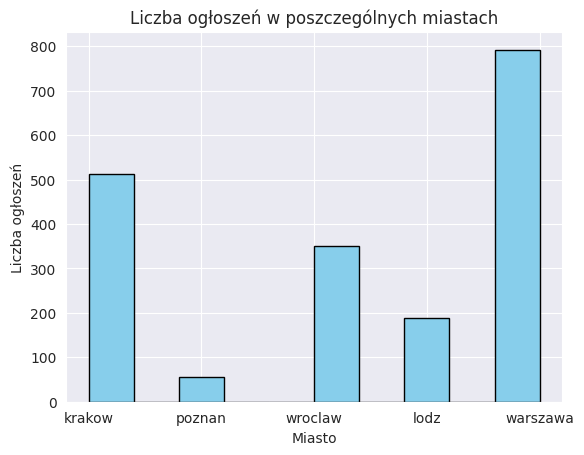

In [12]:
draw_hist(df['city'],'Miasto','Liczba ogłoszeń','Liczba ogłoszeń w poszczególnych miastach')
plt.show()

Na podstawie powyższego histogramu widać znaczące różnice w liczbie ogłoszeń w zależności od miasta

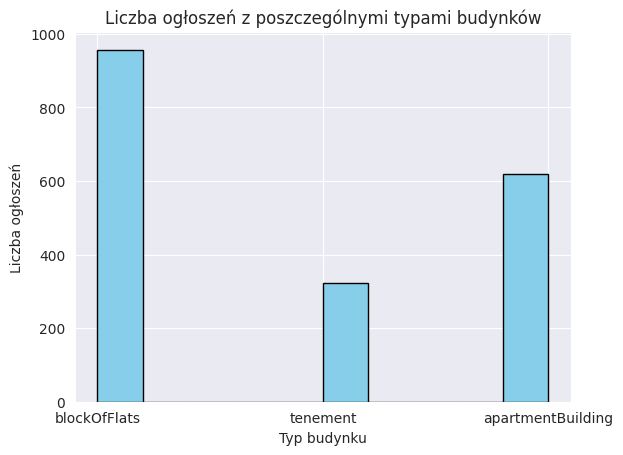

In [13]:
draw_hist(df['type'],'Typ budynku','Liczba ogłoszeń', 'Liczba ogłoszeń z poszczególnymi typami budynków')
plt.show()

Na powyższym wykresie widać, że najwięcej ofert w dużych miastach dotyczy mieszkań w blokach

In [14]:
cities = {'warszawa': 'Warszawa', 'krakow': 'Kraków', 'wroclaw': 'Wrocław', 'lodz': 'Łódź', 'poznan': 'Poznań'}

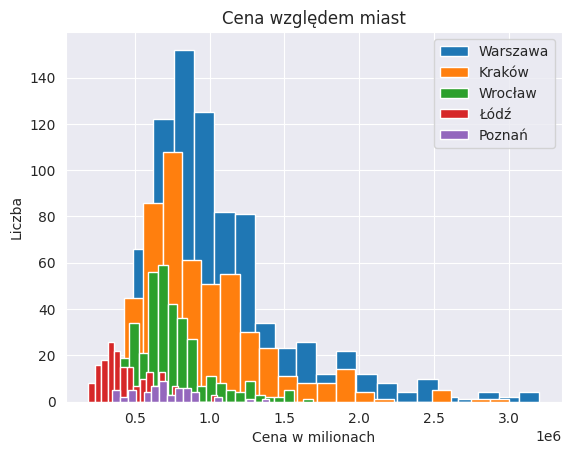

In [15]:
plt.title("Cena względem miast")
for city in cities.keys():
    plt.hist(df[df['city'] == city]['price'],bins=20,label=cities.get(city))
plt.xlabel('Cena w milionach')
plt.ylabel('Liczba')
plt.legend()
plt.show()

In [55]:
group_by_city = df.groupby('city')['price']
group_by_city.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
krakow,290.0,1.044592e+06,444924.109751,429000.0,739000.0,949000.0,1241500.0,3000000.0
lodz,128.0,4.736051e+05,183809.196547,190000.0,329750.0,439000.0,601750.0,1050000.0
poznan,34.0,7.291296e+05,237371.566318,349000.0,616250.0,699000.0,846750.0,1400000.0
warszawa,537.0,1.130794e+06,501742.580009,499000.0,799000.0,990000.0,1295640.0,3200000.0
wroclaw,229.0,7.671784e+05,250499.305136,397700.0,610000.0,716000.0,850000.0,1690000.0


Wszystkie miasta z wyjątkiem Łodzi mają największe skupisko w podobnym miejscu czyli około 600-800 tyś. złotych, a w przypadku Łodzi jest to około 300 tyś. złotych

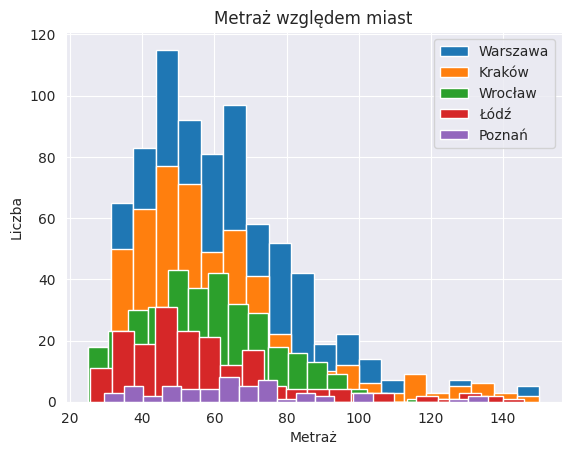

In [16]:
plt.title("Metraż względem miast")
for city in cities.keys():
    plt.hist(df[df['city'] == city]['squareMeters'],bins=20,label=cities.get(city))
plt.xlabel('Metraż')
plt.ylabel('Liczba')
plt.legend()
plt.show()

In [56]:
group_by_city = df.groupby('city')['squareMeters']
group_by_city.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
krakow,290.0,62.133276,23.981986,25.00,46.0000,58.035,71.925,150.00
lodz,128.0,60.827344,26.299899,25.55,42.3475,55.830,71.485,145.93
poznan,34.0,68.825882,24.911761,31.00,51.6000,64.400,83.055,135.70
warszawa,537.0,62.303464,23.295625,25.00,45.6200,57.700,74.300,150.00
wroclaw,229.0,59.160349,19.562485,25.00,43.5800,59.810,70.300,135.50


Metraż ofert jest bardzo do siebie zbliżony, Poznań według tych danych ma największe mieszkania ale próbka ofert z Poznania jest znacznie mniejsza.

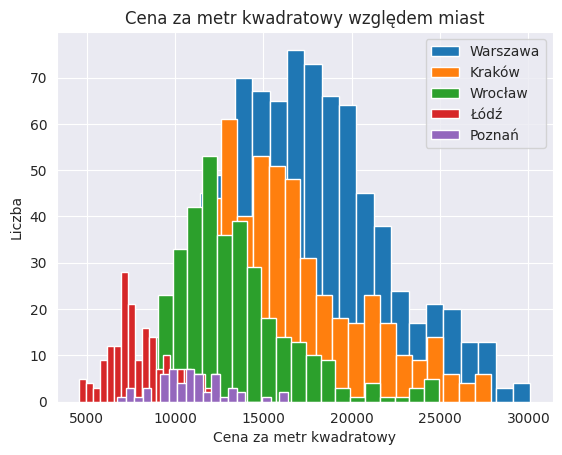

In [17]:
plt.title("Cena za metr kwadratowy względem miast")
for city in cities.keys():
    prices_per_square_meter = df[df['city'] == city]['price'] / df[df['city'] == city]['squareMeters']
    plt.hist(prices_per_square_meter, bins=20, label=cities.get(city))

plt.xlabel('Cena za metr kwadratowy')
plt.ylabel('Liczba')
plt.legend()
plt.show()

In [63]:
group_by_city = df.groupby('city')['price/squareMeter']
group_by_city.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
krakow,290.0,17056.612070,4062.358372,10000.000000,13928.571429,16231.884058,19617.018958,27880.004461
lodz,128.0,8046.239641,1788.771633,4597.383453,6846.395881,7597.499616,8959.550771,12432.432432
poznan,34.0,10873.969900,2101.382425,7262.474368,9660.148775,10648.077725,12218.321399,16400.000000
warszawa,537.0,18354.062974,4313.477934,10432.835821,14872.340426,18033.946252,20948.717949,30113.924051
wroclaw,229.0,13470.699866,3466.291377,8193.548387,11034.482759,12581.168831,15294.117647,24948.717949


Mimo zbliżonych najczęstszych wartości ofert, to ceny za metr w Warszawie i Krakowie znacząco odbiegają od reszty miast

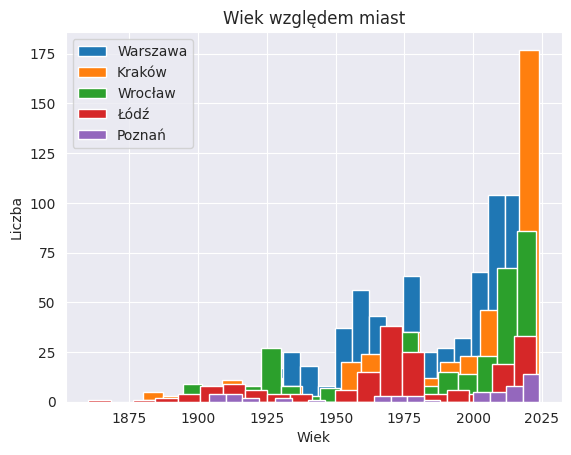

In [18]:
plt.title("Wiek względem miast")
for city in cities.keys():
    plt.hist(df[df['city'] == city]['buildYear'],bins=20,label=cities.get(city))
plt.xlabel('Wiek')
plt.ylabel('Liczba')
plt.legend()
plt.show()

In [64]:
group_by_city = df.groupby('city')['buildYear']
group_by_city.describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
krakow,290.0,1988.706897,38.457008,1880.0,1967.25,2008.5,2019.00,2024.0
lodz,128.0,1969.750000,37.565271,1860.0,1953.50,1970.0,2006.00,2023.0
poznan,34.0,1980.764706,43.013781,1904.0,1950.25,2004.0,2016.75,2024.0
warszawa,537.0,1987.836127,30.447642,1900.0,1964.00,2000.0,2014.00,2023.0
wroclaw,229.0,1981.873362,38.340312,1890.0,1959.00,1990.0,2015.00,2023.0


W Krakowie i Warszawie jest najwięcej nowych mieszkań, a w Łodzi jest ich najmniej co może świadczyć o zapotrzebowaniu na tych lokalnych rynkach

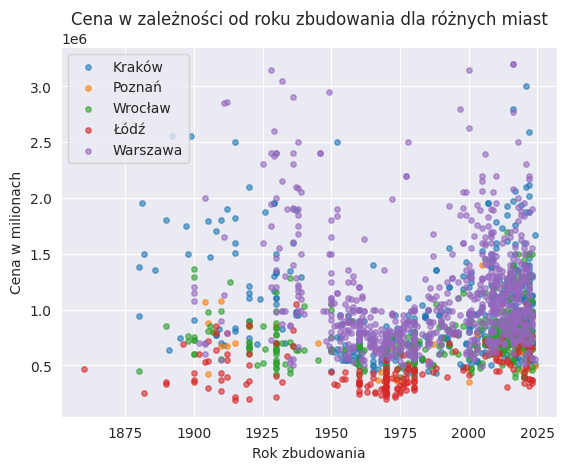

In [19]:
for city in df['city'].unique():
    city_data = df[df['city'] == city]
    plt.scatter(city_data['buildYear'], city_data['price'], label=cities.get(city), alpha=0.6,s=15)

plt.xlabel('Rok zbudowania')
plt.ylabel('Cena w milionach')
plt.title('Cena w zależności od roku zbudowania dla różnych miast')
plt.legend()

plt.show()

Na tym wykresie można zaobserwować, że oferty ze starych budynków w Krakowie i Warszawie są znacznie droższe od ofert w budynkach równie starych w innych miastach

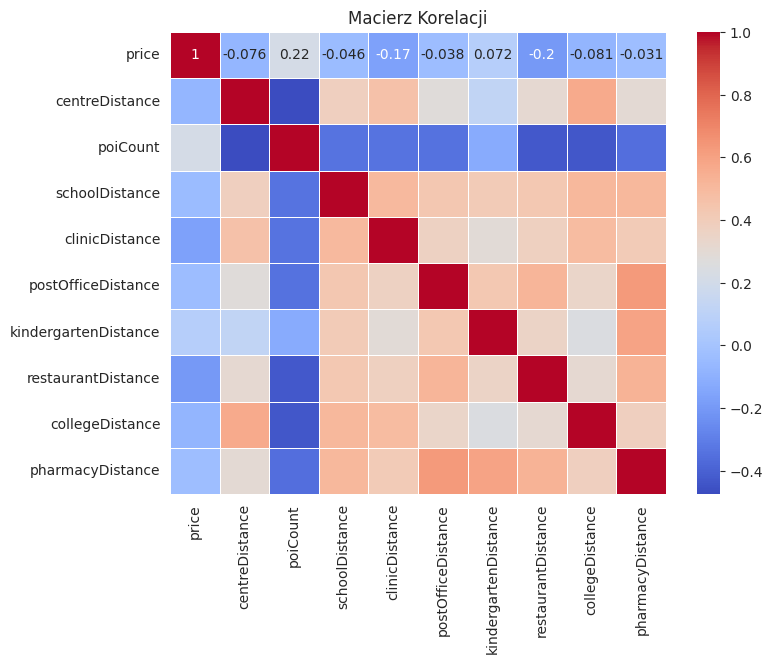

In [45]:
scaler = StandardScaler()
columns = df.columns.difference(['city','type','condition','buildingMaterial'])
df_norm = pd.DataFrame(scaler.fit_transform(df[columns]),columns=columns)
correlation_matrix = df_norm[['price',"centreDistance",'poiCount','schoolDistance','clinicDistance','postOfficeDistance','kindergartenDistance','restaurantDistance','collegeDistance','pharmacyDistance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Macierz Korelacji')
plt.show()

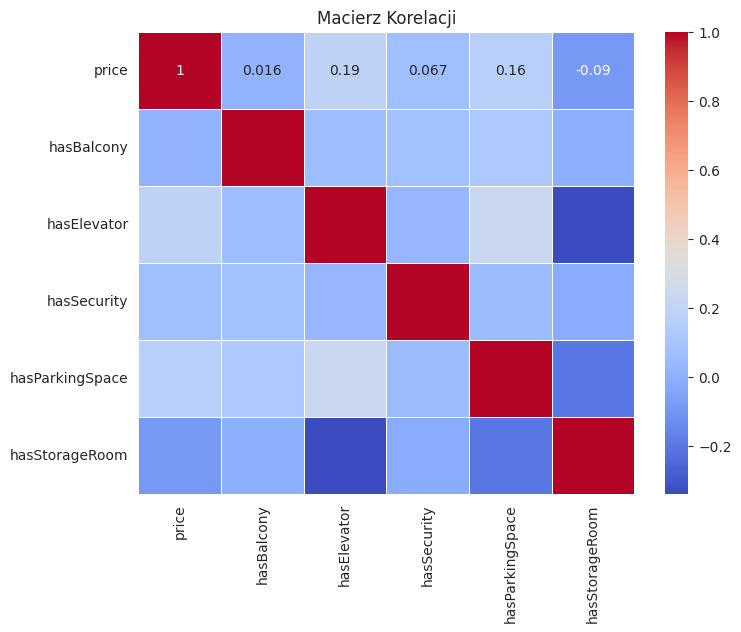

In [51]:
scaler = StandardScaler()
columns = df.columns.difference(['city','type','condition','buildingMaterial'])
df_norm = pd.DataFrame(scaler.fit_transform(df[columns]),columns=columns)
correlation_matrix = df_norm[['price',"hasBalcony",'hasElevator', 'hasSecurity', 'hasParkingSpace', 'hasStorageRoom']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Macierz Korelacji')
plt.show()

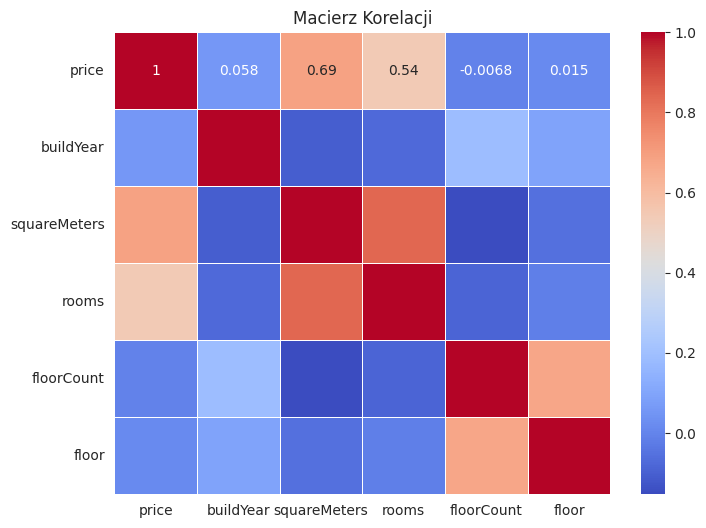

In [42]:
scaler = StandardScaler()
columns = df.columns.difference(['id','city','type','condition','buildingMaterial',])
df_norm = pd.DataFrame(scaler.fit_transform(df[columns]),columns=columns)
correlation_matrix = df_norm[['price',"buildYear",'squareMeters', 'rooms', 'floorCount', 'floor']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Macierz Korelacji')
plt.show()